In [26]:
import os

drake_dir = "output_metadata/drake-only"
kendrick_dir = "output_metadata_goat/goat-only"

drake_files = os.listdir(drake_dir)
kendrick_files = os.listdir(kendrick_dir)


print(len(drake_files))
print(len(kendrick_files))

907
913


In [27]:
import pandas as pd
import json

df_list = []

# resulting dataframe
# lyric | artist | title | url 

# load drake lyrics
for file in drake_files:
    with open(f"{drake_dir}/{file}", "r") as f:
        try:    
            data = json.load(f)

            for lyric in data.get("lyrics", []):
                df_list.append({"lyric": lyric, "artist": data.get("artist", "drake"), "title": data.get("title", ""), "url": data.get("url", "")})
        except:
            print(f"Error loading {file}")            


# load kendrick lyrics
for file in kendrick_files:
    with open(f"{kendrick_dir}/{file}", "r") as f:
        data = json.load(f)

        for lyric in data.get("lyrics", []):
            df_list.append({"lyric": lyric, "artist": data.get("artist", "kendrick"), "title": data.get("title", ""), "url": data.get("url", "")})

df = pd.DataFrame(df_list)
df.head()


Error loading .DS_Store


,lyric,artist,title,url
0,First-person shooter mode,Drake,First Person Shooter,
1,We turnin' your song to a funeral (the one for...,Drake,First Person Shooter,
2,To them niggas that say they wan' off us,Drake,First Person Shooter,
3,You better be talkin' 'bout workin' in cubicles,Drake,First Person Shooter,
4,"Yeah, them boys had it locked, but I knew the ...",Drake,First Person Shooter,


In [30]:
# order by lyric length
df = df.sort_values(by='lyric', key=lambda x: x.str.len(), ascending=False)

# remove all rows where the lyric is empty or less than 2 characters
df = df[df['lyric'].str.len() > 2]
df.to_csv('drake_kendrick_lyrics.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv('drake_kendrick_lyrics.csv')

In [2]:
df_words = df.copy()

In [3]:
# Create a dataframe where each row is a word instead of a lyric line
df_words_list = []

for _, row in df.iterrows():
    lyric = row['lyric']
    artist = row['artist']
    title = row['title']
    url = row['url']
    
    # Split the lyric into words
    import re
    words = [re.sub(r'[^a-z]', '', w.lower()) for w in str(lyric).split()]
    words = [w for w in words if w]  # Remove empty strings
    
    # Create a row for each word
    for word in words:
        df_words_list.append({
            'word': word,
            'artist': artist,
            'title': title,
            'url': url
        })

df_words = pd.DataFrame(df_words_list)

df_words.head(10)

,word,artist,title,url
0,bro,Kendrick Lamar,"Sing About Me, I’m Dying of Thirst",NaN
1,we,Kendrick Lamar,"Sing About Me, I’m Dying of Thirst",NaN
2,can,Kendrick Lamar,"Sing About Me, I’m Dying of Thirst",NaN
3,go,Kendrick Lamar,"Sing About Me, I’m Dying of Thirst",NaN
4,back,Kendrick Lamar,"Sing About Me, I’m Dying of Thirst",NaN
5,right,Kendrick Lamar,"Sing About Me, I’m Dying of Thirst",NaN
6,now,Kendrick Lamar,"Sing About Me, I’m Dying of Thirst",NaN
7,my,Kendrick Lamar,"Sing About Me, I’m Dying of Thirst",NaN
8,nigga,Kendrick Lamar,"Sing About Me, I’m Dying of Thirst",NaN
9,like,Kendrick Lamar,"Sing About Me, I’m Dying of Thirst",NaN


In [4]:
# Group by word and artist, count occurrences
df_word_counts = df_words.groupby(['word', 'artist'], as_index=False).agg({
    'title': 'first',  # Take first title as reference
    'url': 'first'     # Take first url as reference
})

# Add count column
df_word_counts['count'] = df_words.groupby(['word', 'artist']).size().values

# Sort by count descending to see most common words first
df_word_counts = df_word_counts.sort_values('count', ascending=False)

# remove all spaces
df_word_counts['artist'] = df_word_counts['artist'].apply(lambda x: x.replace(' ', ''))
# remove all special characters
# show all artists
df_word_counts['artist'].apply(lambda x: x.lower())

df_word_counts['artist'] = df_word_counts['artist'].apply(lambda x: 'kendrick' if x == 'KendrickLamar' else x)
df_word_counts['artist'] = df_word_counts['artist'].apply(lambda x: 'drake' if x == 'Drake' else x)

df_word_counts_cut = df_word_counts[df_word_counts['artist'].isin(['kendrick', 'drake'])]
df_word_counts_cut.head(20)


,word,artist,title,url,count
59594,the,kendrick,Not Like Us (Mixed),https://genius.com/Kendrick-lamar-not-like-us-...,15610
28912,i,kendrick,Before He Was Famous Freestyle (Nickerson Gard...,https://genius.com/Kendrick-lamar-before-he-wa...,14153
68379,you,kendrick,Before He Was Famous Freestyle (Nickerson Gard...,https://genius.com/Kendrick-lamar-before-he-wa...,11236
28911,i,drake,Unstoppable,https://genius.com/Drake-unstoppable-lyrics,10257
79,a,kendrick,Before He Was Famous Freestyle (Nickerson Gard...,https://genius.com/Kendrick-lamar-before-he-wa...,9258
68378,you,drake,On BS,https://genius.com/Drake-and-21-savage-on-bs-l...,8600
59593,the,drake,Supermax*,https://genius.com/Drake-supermax-lyrics,7993
1934,and,kendrick,Before He Was Famous Freestyle (Nickerson Gard...,https://genius.com/Kendrick-lamar-before-he-wa...,7030
39217,my,kendrick,Before He Was Famous Freestyle (Nickerson Gard...,https://genius.com/Kendrick-lamar-before-he-wa...,6919
61153,to,kendrick,Before He Was Famous Freestyle (Nickerson Gard...,https://genius.com/Kendrick-lamar-before-he-wa...,6423


In [5]:
df_kendrick = df_word_counts[df_word_counts['artist'] == 'kendrick']
df_drake = df_word_counts[df_word_counts['artist'] == 'drake']

In [6]:
df_drake.head(20)
df_drake.to_csv('drake_word_counts.csv', index=False)

In [41]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [8]:
drake_meta_text = " "

for index, row in df_drake.iterrows():
    for i in range(row['count']):
        drake_meta_text += row['word'] + " "

In [9]:
# save drake_meta_text to a file
with open('drake_meta_text.txt', 'w') as f:
    f.write(drake_meta_text)


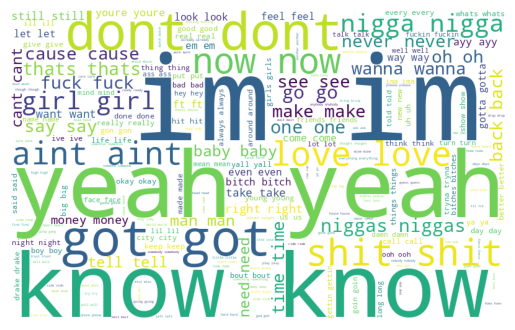

In [44]:
wc = WordCloud(background_color='white', width = 800, height = 500).generate(drake_meta_text)
plt.axis("off")
plt.imshow(wc)

In [10]:
df_kendrick.head(20)
df_kendrick.to_csv('kendrick_word_counts.csv', index=False)

In [11]:
kendrick_meta_text = " "

for index, row in df_kendrick.iterrows():
    for i in range(row['count']):
        kendrick_meta_text += row['word'] + " "

In [12]:
# save drake_meta_text to a file
with open('kendrick_meta_text.txt', 'w') as f:
    f.write(kendrick_meta_text)
